# Import libraries

In [12]:

library(tidyverse)
library(titanic)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



# Prepare and cleaning
- Cleaning missing value
- Changing appropriate data type

In [13]:

# Clean missing data
titanic_train %>% apply(FUN = function(col) sum(is.na(col)), MARGIN=2)
## 177rows that Age are missing

# Drop all rows containing missing data
df <- titanic_train %>% na.omit()

df %>% apply(FUN = function(col) sum(is.na(col)), MARGIN=2)

PassengerId 0 Survived 0 Pclass 0 Name 0 Sex 0 Age 177 SibSp 0 Parch 0 Ticket 0 Fare 0 Cabin 0 Embarked 0

PassengerId 0 Survived 0 Pclass 0 Name 0 Sex 0 Age 0 SibSp 0 Parch 0 Ticket 0 Fare 0 Cabin 0 Embarked 0

In [14]:
# Change categorical data to factor type
categorical_data <- c('Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked')
for (cate in categorical_data){
  df[[cate]] <- factor(df[[cate]])
}
df %>% glimpse()

Rows: 714
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19…
$ Survived    <fct> 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1…
$ Pclass      <fct> 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <fct> male, female, female, female, male, male, male, female, fe…
$ Age         <dbl> 22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, …
$ SibSp       <fct> 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0…
$ Parch       <fct> 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 51.8625, 21.0750…
$ Cabin       <chr> "", "C85", "", "C123", "", "E46", "", "", "", "G6", "C103"…
$ Embarked    <fct> S, C, S, S, S, S, S, S, C, S, S, S, S, S, S, Q, S, S, S, Q…


# Split data
70:30 (Train:Test)

In [16]:
set.seed(52)
train_row <- sample(1:nrow(df), size = (0.7 * nrow(df)))
train_data<- df[train_row,]
test_data <- df[-train_row, ]
cat('Total rows:', nrow(df))
cat('\nTrain data rows:', nrow(train_data))
cat('\nTest data rows:', nrow(test_data))

Total rows: 714
Train data rows: 499
Test data rows: 215

# Build a logistic regression model
1 dependent variables
- Survived

<br>4 independent variables
- Age
- Pclass
- Sex
- SibSp 

<br> Threshold = 0.55

In [17]:
model <- glm(Survived ~ Age+Pclass+Sex+SibSp,
             data = train_data, family='binomial')
model %>% summary()


Call:
glm(formula = Survived ~ Age + Pclass + Sex + SibSp, family = "binomial", 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9568  -0.6192  -0.3919   0.6094   2.3426  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.48945    0.55329   8.114 4.89e-16 ***
Age          -0.04968    0.01004  -4.947 7.55e-07 ***
Pclass2      -1.49594    0.34778  -4.301 1.70e-05 ***
Pclass3      -2.56797    0.34158  -7.518 5.57e-14 ***
Sexmale      -2.59057    0.26096  -9.927  < 2e-16 ***
SibSp1       -0.03148    0.27112  -0.116   0.9076    
SibSp2       -1.10539    0.71695  -1.542   0.1231    
SibSp3       -0.51770    1.12024  -0.462   0.6440    
SibSp4       -1.57576    0.92585  -1.702   0.0888 .  
SibSp5      -15.58800  745.09904  -0.021   0.9833    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 678.55  on 498  degrees of 

In [18]:
# Predict
train_data$predicted_probability <- model %>% predict(type='response')

# Threshold = 0.55
threshold <- 0.55
train_data$predicted_survived <- if_else(train_data$predicted_probability > threshold,1,0)

## Evaluating model
Create a confusion matrix and calculate acc, precision, recall, f1-score

In [29]:
(conf_matrix <- table(train_data$Survived, train_data$predicted_survived,
                      dnn = c("Actual","Predict")))
accuracy <- (conf_matrix[1,1] + conf_matrix[2,2]) / sum(conf_matrix)
precision <- conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[1,2])
recall <- conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[2,1])
f1_score <- 2 * precision * recall / (precision + recall)
cat("Accuracy:", accuracy, "\nPrecision:", precision,"\nRecall:", recall, "\nF1-Score:",f1_score)


Accuracy: 0.8096192 
Precision: 0.8097826 
Recall: 0.7129187 
F1-Score: 0.7582697

      Predict
Actual   0   1
     0 255  35
     1  60 149

## Applying the model the test data
using the model with test data with the same threshold

In [32]:
test_data$predicted_probability <- predict(object=model, type='response',
                                           newdata = test_data)
test_data$predicted_survived <- if_else(test_data$predicted_probability > threshold,1,0)

**Evaluate the model to test data**
<br> Create a confusion matrix and calculate the accuracy, precision, recall, f1-score again. We are expecting the similar result with train data.

In [35]:
(conf_matrix <- table(test_data$Survived, test_data$predicted_survived,
                      dnn = c("Actual","Predict")))
accuracy_test <- (conf_matrix[1,1] + conf_matrix[2,2]) / sum(conf_matrix)
precision_test <- conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[1,2])
recall_test <- conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[2,1])
f1_score_test <- 2 * precision_test * recall_test / (precision_test + recall_test)
cat("Accuracy:", accuracy_test, "\nPrecision:", precision_test,"\nRecall:", recall_test, "\nF1-Score:",f1_score_test)

Accuracy: 0.8 
Precision: 0.7111111 
Recall: 0.7901235 
F1-Score: 0.748538

      Predict
Actual   0   1
     0 108  26
     1  17  64

## Summarise the model
The result from both test and train data were similar, so the model is working!

   Type  Accuracy Precision    Recall  F1_Score
1 Train 0.8096192 0.8097826 0.7129187 0.7582697
2  Test 0.8000000 0.7111111 0.7901235 0.7485380


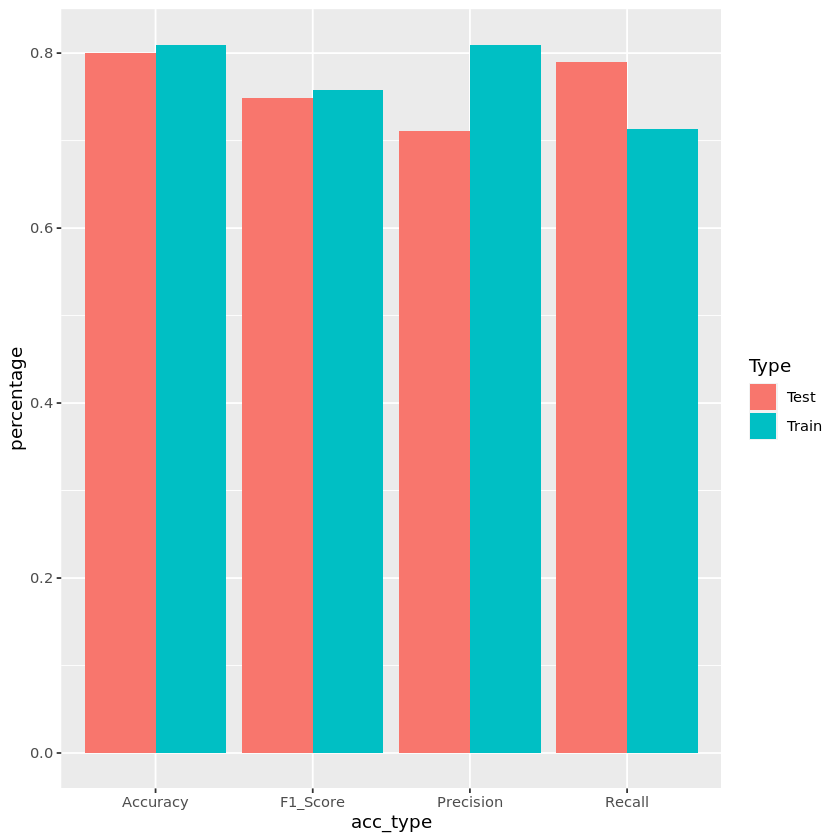

In [37]:
# Creating summary data frame in wide format
summary_model <- data.frame(
  Type = c('Train', 'Test'),
  Accuracy = c(accuracy, accuracy_test),
  Precision = c(precision, precision_test),
  Recall = c(recall, recall_test),
  F1_Score = c(f1_score, f1_score_test)
)
# Turn to long format to plot
long_format <- summary_model %>%
  pivot_longer(-Type ,
                names_to = "acc_type",
                values_to = "percentage")

# Plot results
print(summary_model)
ggplot(data=long_format,
       mapping =  aes(x=acc_type, y=percentage, fill = Type)) +
  geom_bar(stat='identity', position = 'dodge')